In [67]:
from google.colab import files
uploaded = files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata (1).xlsx


#Importing the data

In [68]:
import pandas as pd
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [ ]:
import pandas as pd
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


from matplotlib import pyplot as plt
_df_0['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

#Data Exploration

In [69]:
df.shape

(42, 2)

In [70]:
df.nunique()

Quarter    42
Sales      42
dtype: int64

In [71]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [72]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

<Axes: >

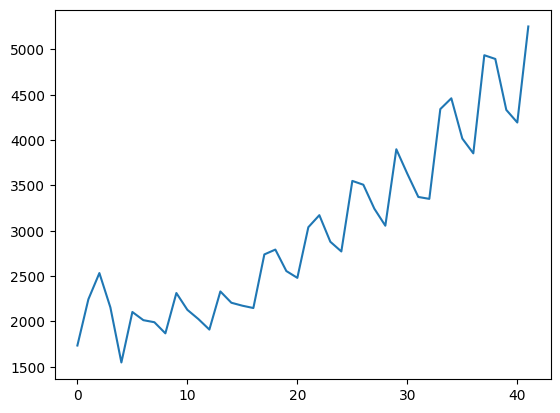

In [73]:
# line plot
df.Sales.plot()

Converting the Quarters into Years



Feature Engineering





In [74]:
df['Quater_Year']= df['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
df.head(10)

,Quarter,Sales,Quater_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


df['Quarter'].str.split('_') splits the values in the "Quarter" column based on the underscore "_" separator, resulting in a list of lists.

lambda x: ' 19'.join(x[:]) is a lambda function applied to each element of the split result. It joins the first part of the split result (which is assumed to be the quarter) with the string " 19", effectively adding " 19" before the quarter to form a string representing the year. This assumes that the year is 19XX format, as it joins " 19" with the year component. If your years are in a different format, you would need to adjust this part accordingly.

Finally, the result is assigned to the "Quarter_Year" column in the DataFrame.

Clean way to convert quarterly periods to datetime in pandas

In [75]:
df['Date'] = (pd.to_datetime(df['Quarter'].str.split('_').apply(lambda x: ''.join(x[::-1])),dayfirst=True))
df.head(10)

,Quarter,Sales,Quater_Year,Date
0,Q1_86,1734.827000,Q1 1986,2086-01-01
1,Q2_86,2244.960999,Q2 1986,2086-04-01
2,Q3_86,2533.804993,Q3 1986,2086-07-01
3,Q4_86,2154.962997,Q4 1986,2086-10-01
4,Q1_87,1547.818996,Q1 1987,2087-01-01
5,Q2_87,2104.411995,Q2 1987,2087-04-01
6,Q3_87,2014.362999,Q3 1987,2087-07-01
7,Q4_87,1991.746998,Q4 1987,2087-10-01
8,Q1_88,1869.049999,Q1 1988,2088-01-01
9,Q2_88,2313.631996,Q2 1988,2088-04-01


In [76]:
#Extracting the Quarters and putting in column
df['Quarters'] = 0

for i in range(42):
    n = df['Quarter'][i]
    df['Quarters'][i] = n[0:2]

df.head(10)

,Quarter,Sales,Quater_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,2086-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,2086-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,2086-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,2086-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,2087-01-01,Q1
5,Q2_87,2104.411995,Q2 1987,2087-04-01,Q2
6,Q3_87,2014.362999,Q3 1987,2087-07-01,Q3
7,Q4_87,1991.746998,Q4 1987,2087-10-01,Q4
8,Q1_88,1869.049999,Q1 1988,2088-01-01,Q1
9,Q2_88,2313.631996,Q2 1988,2088-04-01,Q2


Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data


In [77]:
df["Date"] = pd.to_datetime(df.Date,format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction
df.head(10)

,Quarter,Sales,Quater_Year,Date,Quarters,month,year
0,Q1_86,1734.827000,Q1 1986,2086-01-01,Q1,Jan,2086
1,Q2_86,2244.960999,Q2 1986,2086-04-01,Q2,Apr,2086
2,Q3_86,2533.804993,Q3 1986,2086-07-01,Q3,Jul,2086
3,Q4_86,2154.962997,Q4 1986,2086-10-01,Q4,Oct,2086
4,Q1_87,1547.818996,Q1 1987,2087-01-01,Q1,Jan,2087
5,Q2_87,2104.411995,Q2 1987,2087-04-01,Q2,Apr,2087
6,Q3_87,2014.362999,Q3 1987,2087-07-01,Q3,Jul,2087
7,Q4_87,1991.746998,Q4 1987,2087-10-01,Q4,Oct,2087
8,Q1_88,1869.049999,Q1 1988,2088-01-01,Q1,Jan,2088
9,Q2_88,2313.631996,Q2 1988,2088-04-01,Q2,Apr,2088


#Data Visualization

<Axes: xlabel='month', ylabel='year'>

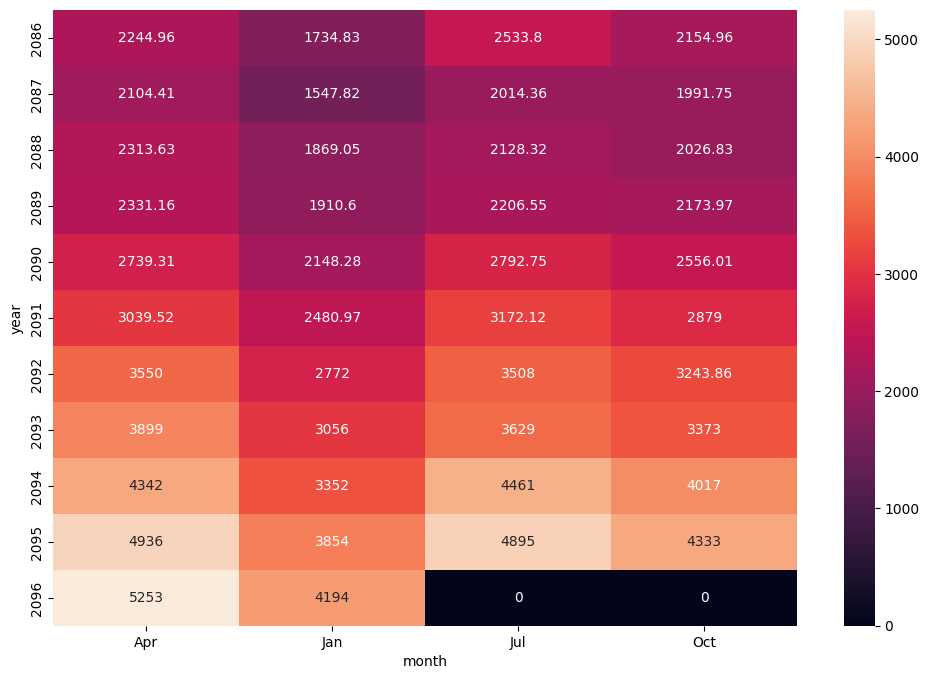

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
heatmap_y_month= pd.pivot_table(data=df, values='Sales', index="year", columns="month", fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


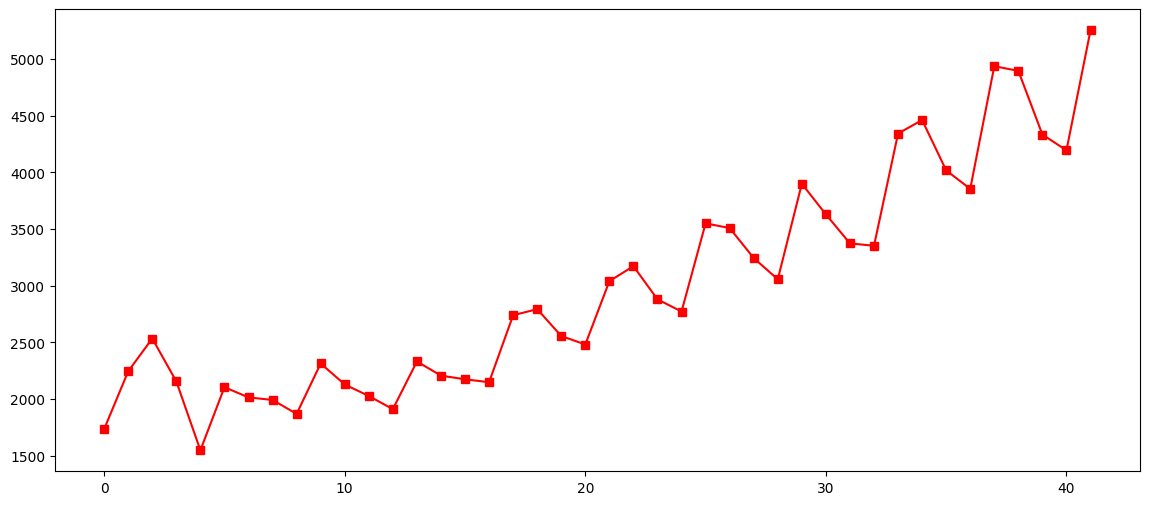

In [79]:
#Lineplot
df['Sales'].plot(figsize=(14,6), color='red', marker='s')
plt.show()


We can see that there is an increasing Trend. So, Trend is not constant.
Variance is also not constant.
Hence the time serise is not stationary.

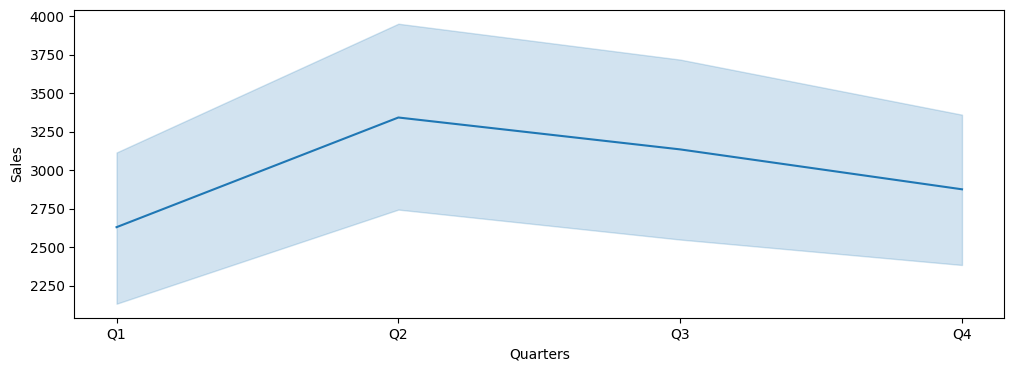

In [80]:
plt.figure(figsize=(12,4))
sns.lineplot(x="Quarters", y="Sales", data=df)
plt.show()

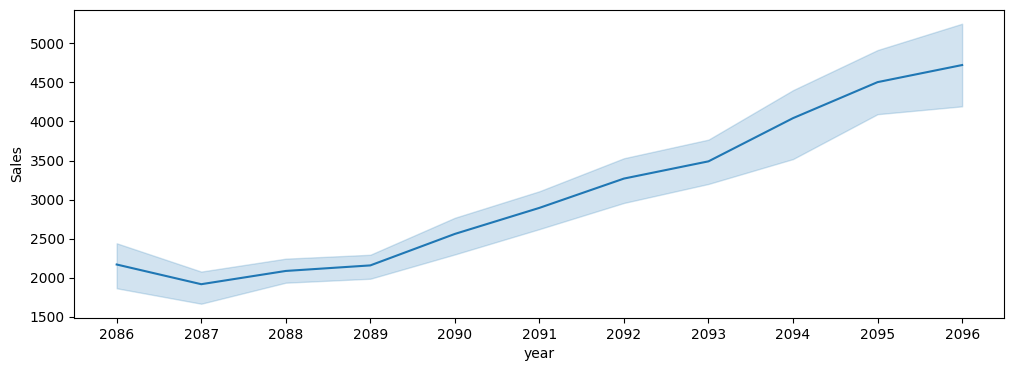

In [81]:
plt.figure(figsize=(12,4))
sns.lineplot(x="year",y="Sales",data=df)
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


#Boxplot

<Axes: xlabel='month', ylabel='Sales'>

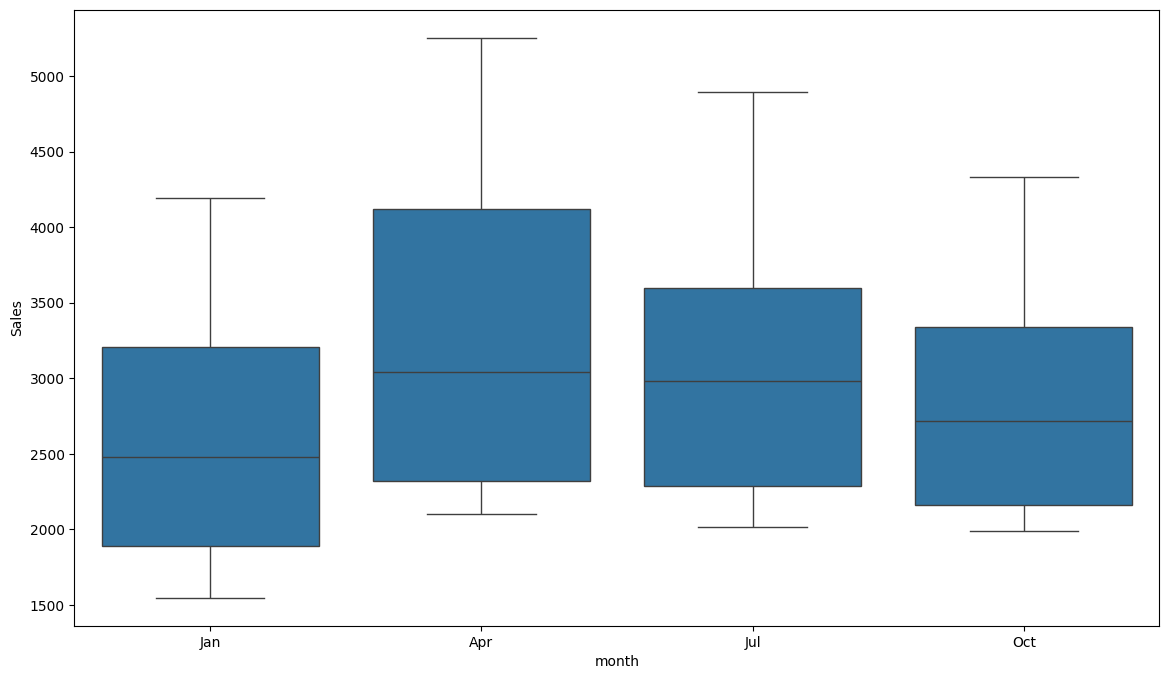

In [82]:
# Boxplot for month
plt.figure(figsize=(14,8))

sns.boxplot(x="month",y="Sales",data=df)

<Axes: xlabel='year', ylabel='Sales'>

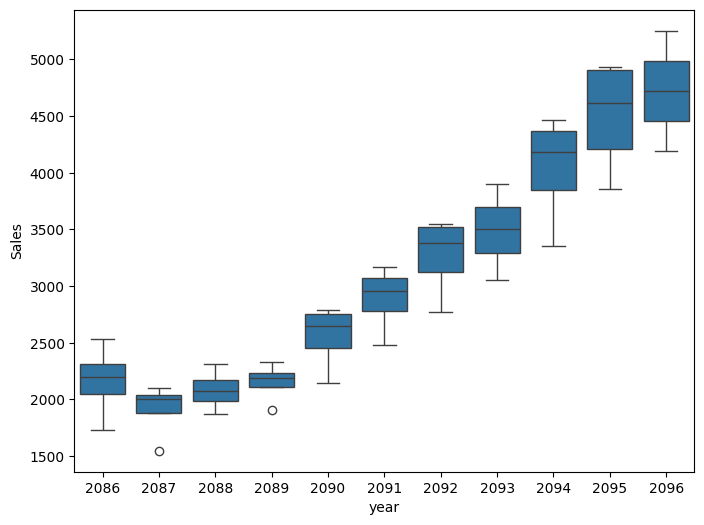

In [83]:
#plt.subplot(212)
plt.figure(figsize=(8,6))
sns.boxplot(x="year",y="Sales",data=df)

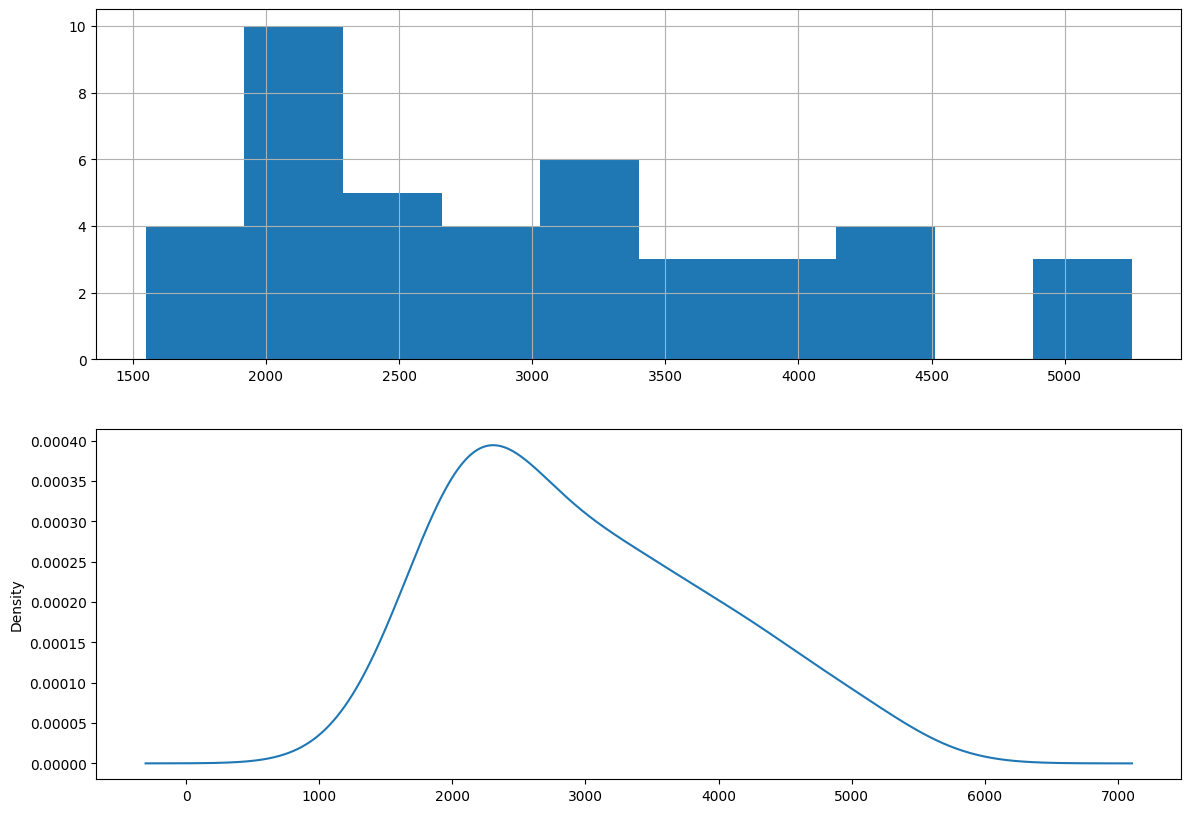

In [84]:
#for histogram
plt.figure(figsize=(14,10))
plt.subplot(211)
df.Sales.hist()
plt.subplot(212)
df.Sales.plot(kind='kde')
plt.show()

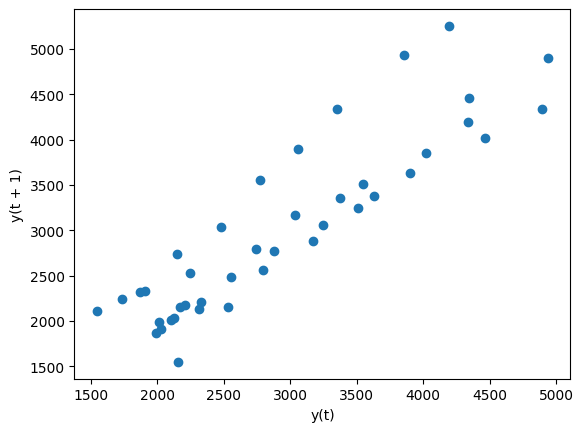

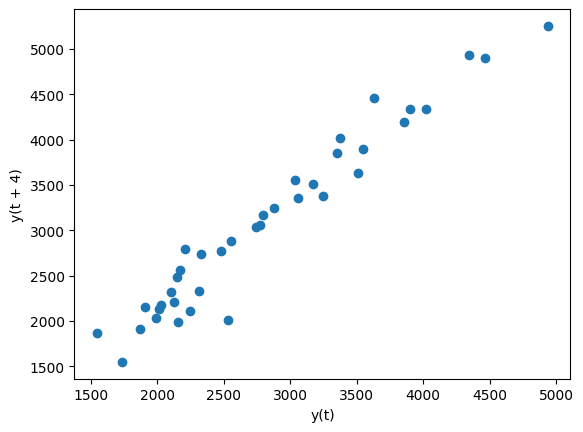

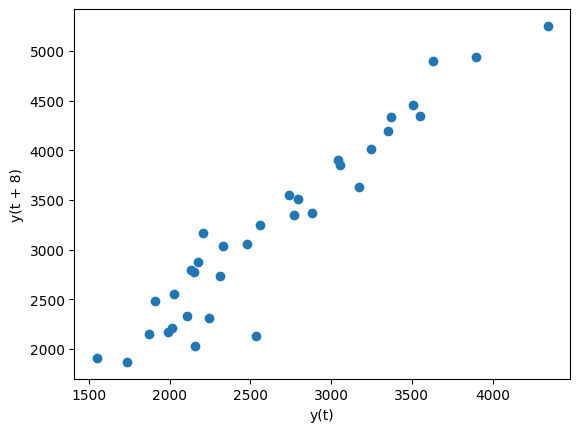

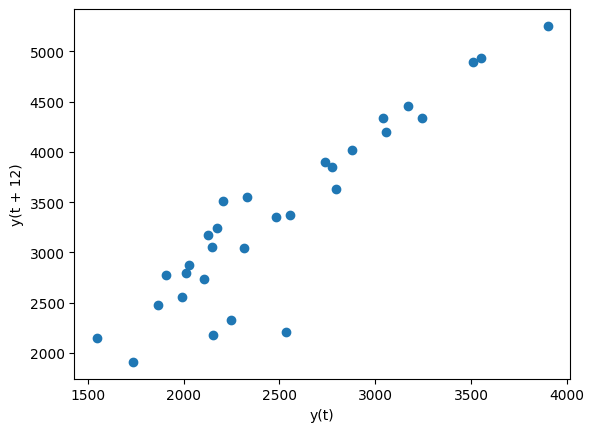

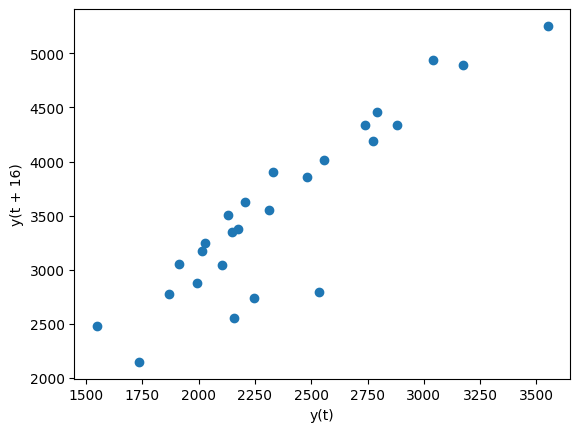

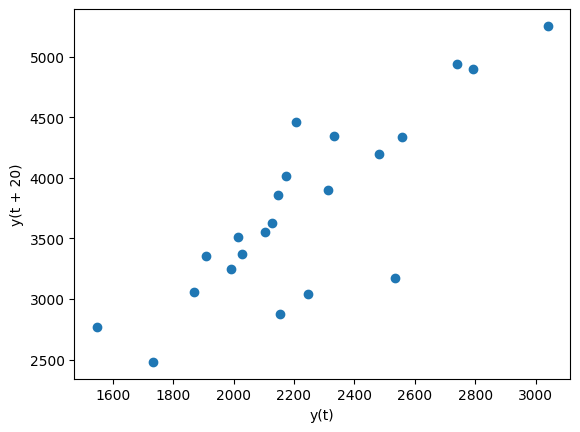

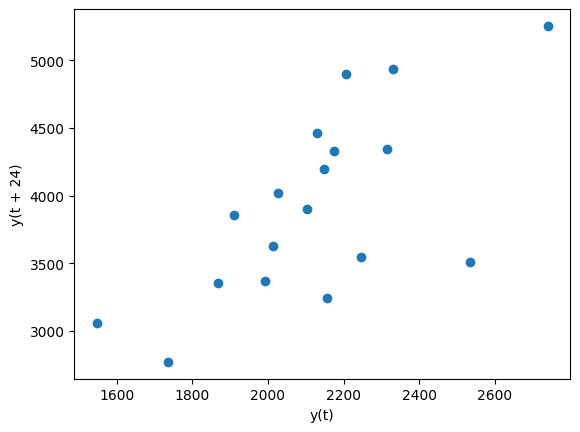

In [85]:
# create a scatter plot
from pandas.plotting import lag_plot
for i in [1, 4, 8, 12, 16, 20, 24]:
    lag_plot(df.Sales, lag=i)
    plt.show()

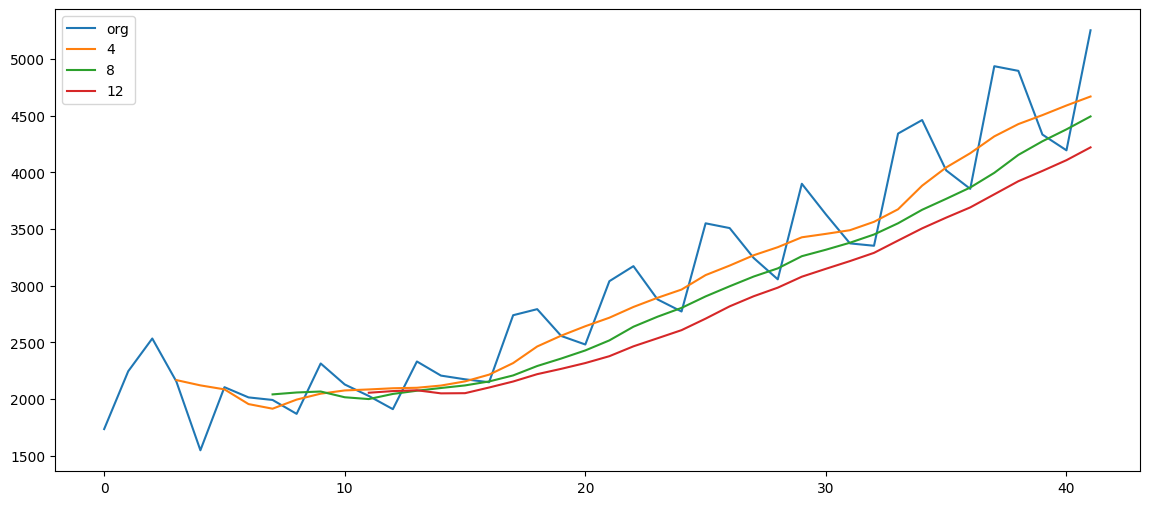

In [86]:
#Moving Avg
plt.figure(figsize=(14,6))
df.Sales.plot(label="org")
for i in range(4,13,4):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

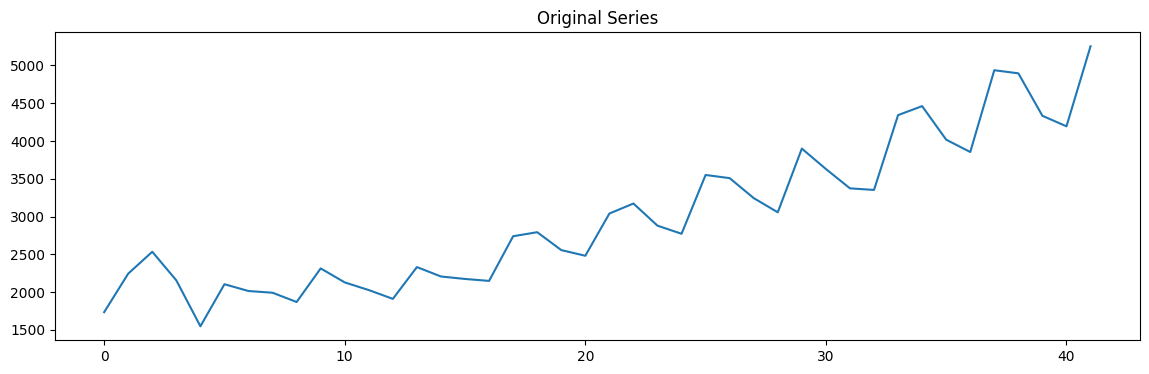

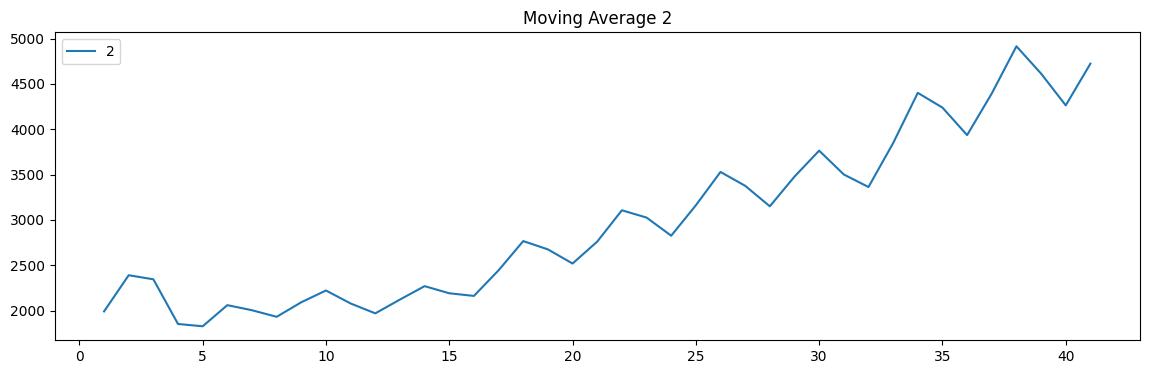

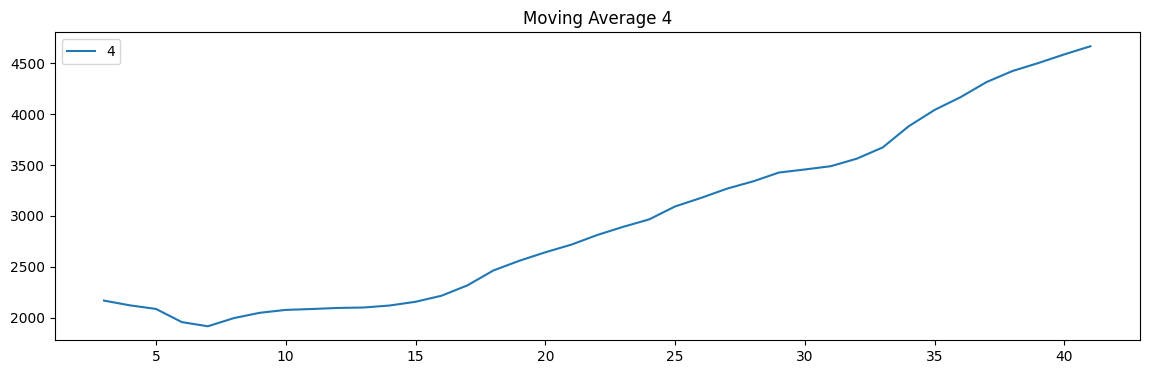

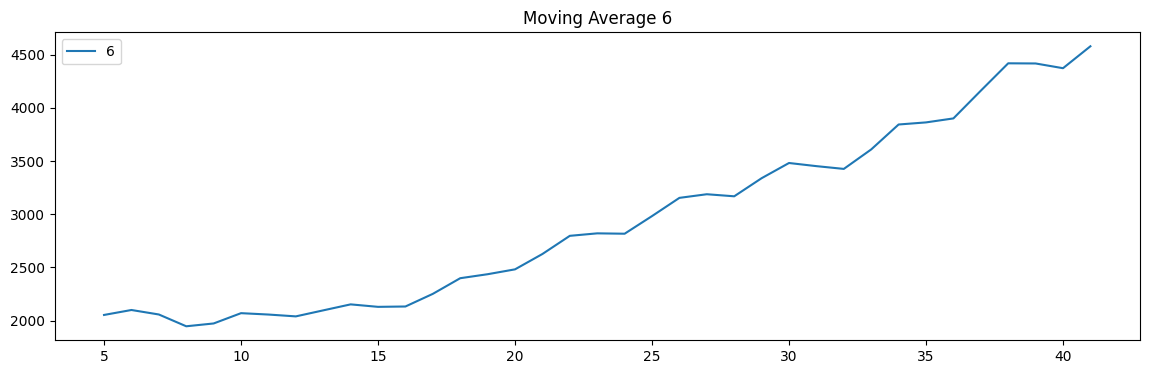

In [87]:
plt.figure(figsize=(14,4))
df.Sales.plot(label="org")
plt.title("Original Series")
for i in range(2,7,2):
    plt.figure(figsize=(14,4))
    df["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

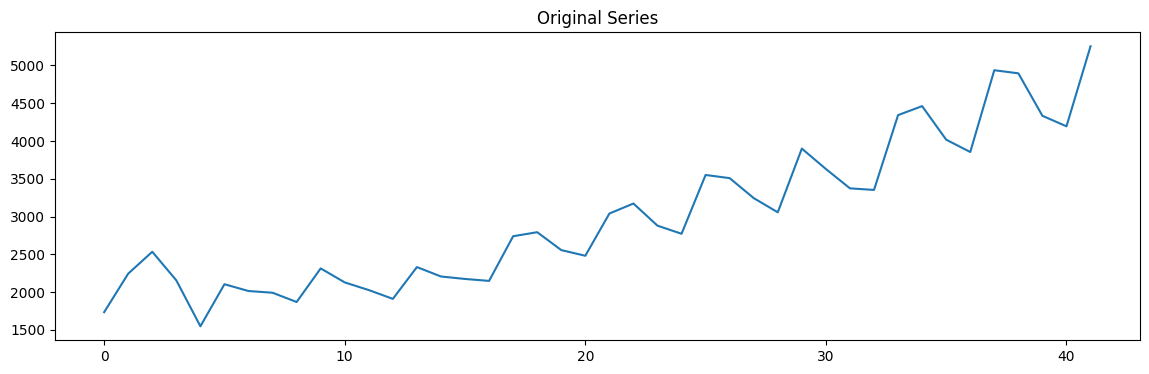

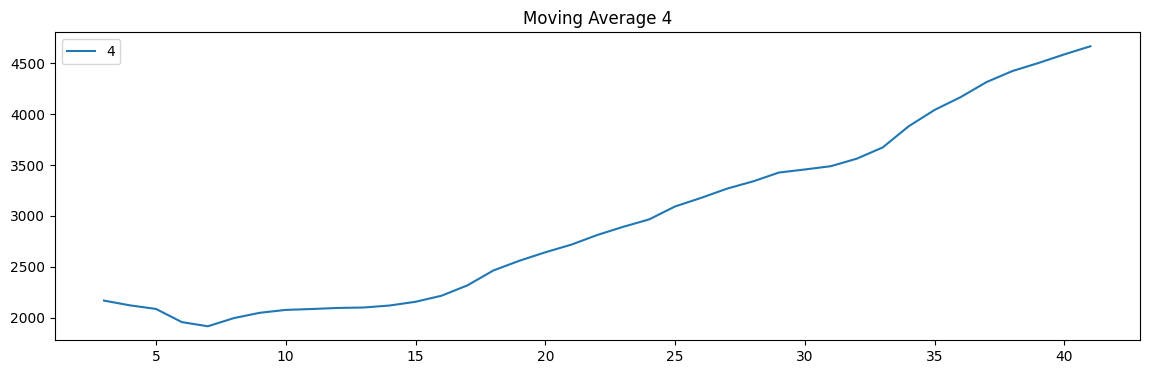

In [88]:

plt.figure(figsize=(14,4))
df.Sales.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(14,4))
df["Sales"].rolling(4).mean().plot(label=str(4))
plt.title("Moving Average "+str(4))
plt.legend(loc='best')
plt.show()


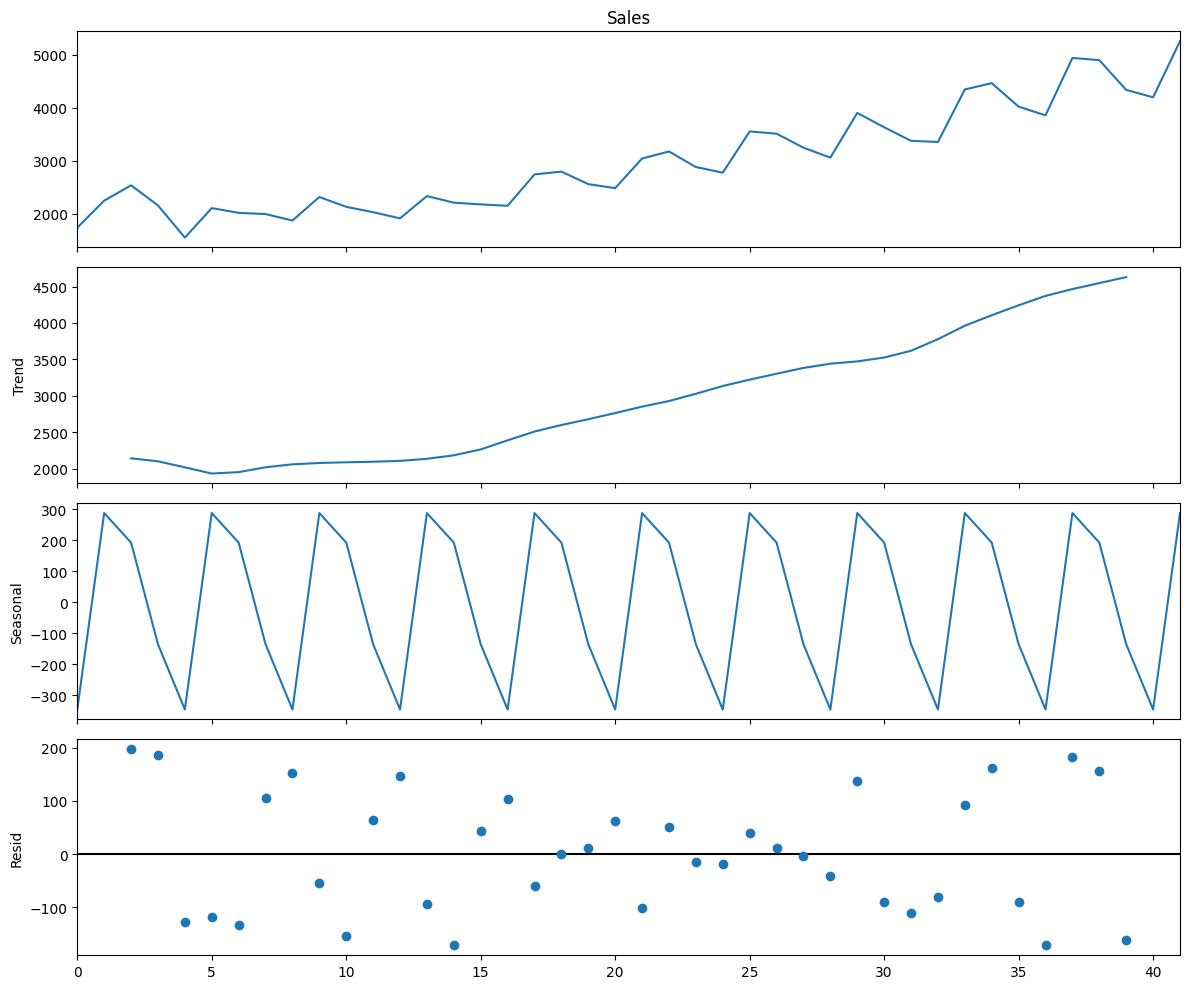

In [89]:
#Time series decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df.Sales,period=4)
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

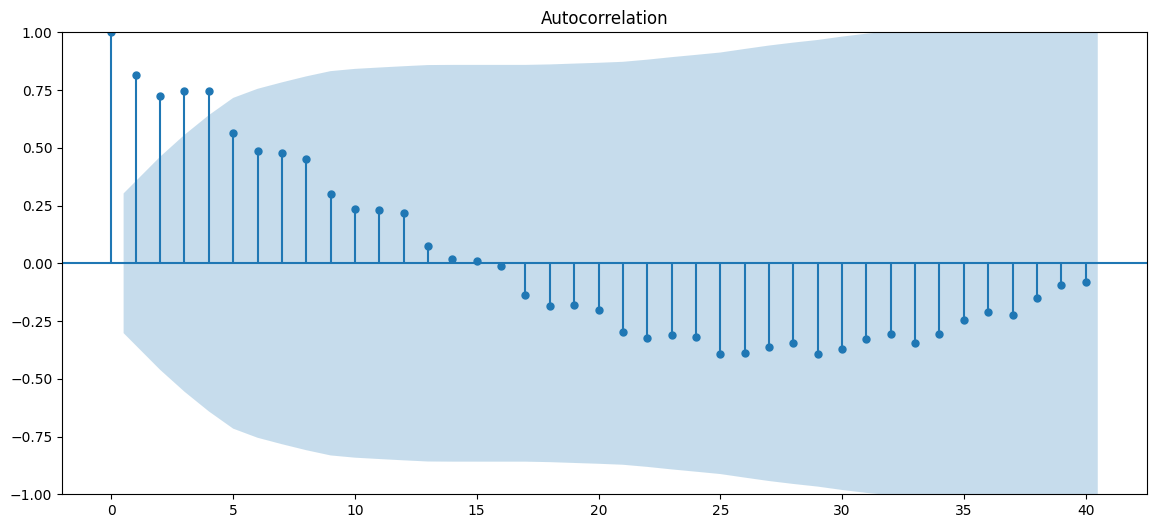

In [90]:
#ACF
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_acf(df.Sales,lags=40)
    plt.show()

Plot the ACF: The resulting correlation coefficients are then typically plotted against the corresponding lags. This plot is called the Autocorrelation Function (ACF) plot.

In [91]:
df.set_index('Date',inplace=True)
df.index.year
df.head()

,Quarter,Sales,Quater_Year,Quarters,month,year
Date,,,,,,
2086-01-01,Q1_86,1734.827000,Q1 1986,Q1,Jan,2086
2086-04-01,Q2_86,2244.960999,Q2 1986,Q2,Apr,2086
2086-07-01,Q3_86,2533.804993,Q3 1986,Q3,Jul,2086
2086-10-01,Q4_86,2154.962997,Q4 1986,Q4,Oct,2086
2087-01-01,Q1_87,1547.818996,Q1 1987,Q1,Jan,2087


#UpSampling with respect to month

In [92]:
upsampled_month = df.drop(['Quarters','Quarter','Quater_Year','month','year'], axis=1)
upsampled_month = upsampled_month.resample('M').mean()
print(upsampled_month.head(13))

                  Sales
Date                   
2086-01-31  1734.827000
2086-02-28          NaN
2086-03-31          NaN
2086-04-30  2244.960999
2086-05-31          NaN
2086-06-30          NaN
2086-07-31  2533.804993
2086-08-31          NaN
2086-09-30          NaN
2086-10-31  2154.962997
2086-11-30          NaN
2086-12-31          NaN
2087-01-31  1547.818996


                  Sales
Date                   
2086-01-31  1734.827000
2086-02-28  1904.871666
2086-03-31  2074.916332
2086-04-30  2244.960999
2086-05-31  2341.242330
2086-06-30  2437.523661
2086-07-31  2533.804993
2086-08-31  2407.524328
2086-09-30  2281.243663
2086-10-31  2154.962997
2086-11-30  1952.581664
2086-12-31  1750.200330
2087-01-31  1547.818996


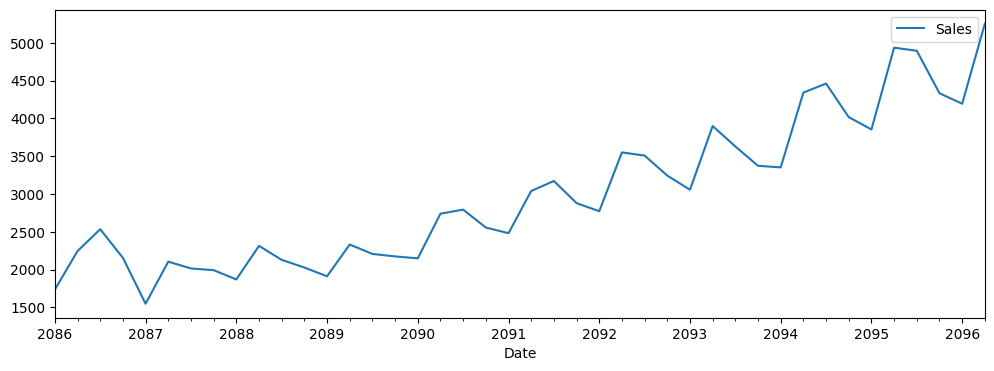

In [93]:
interpolated_month = upsampled_month.interpolate(method='linear')
print(interpolated_month.head(13))
interpolated_month.plot(figsize=(12,4))
plt.show()

In [94]:
interpolated_month

,Sales
Date,
2086-01-31,1734.827000
2086-02-28,1904.871666
2086-03-31,2074.916332
2086-04-30,2244.960999
2086-05-31,2341.242330
...,...
2095-12-31,4240.333333
2096-01-31,4194.000000
2096-02-29,4547.000000


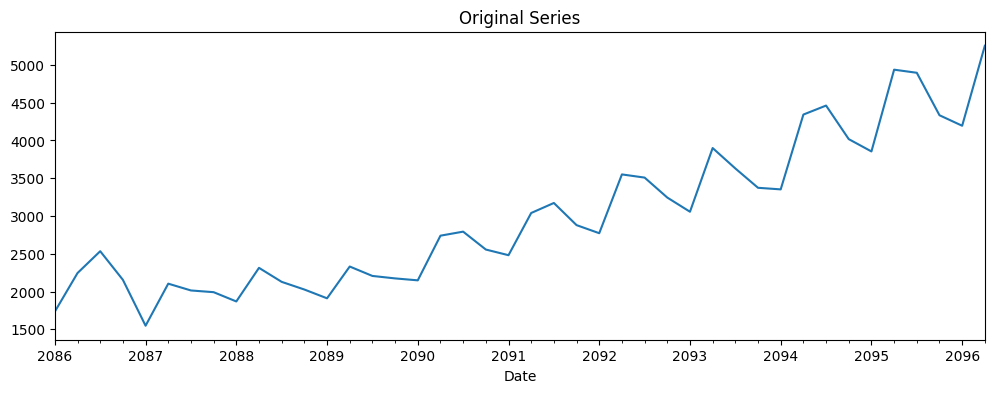

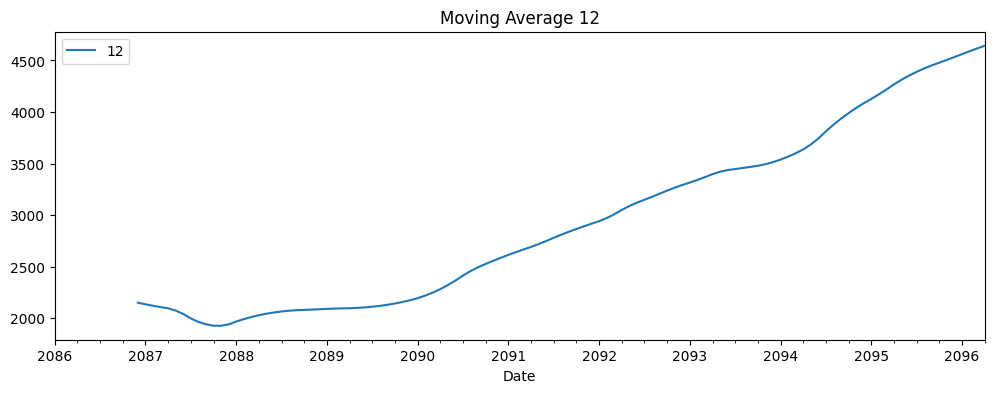

In [95]:
plt.figure(figsize=(12,4))
interpolated_month.Sales.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(12,4))
interpolated_month["Sales"].rolling(12).mean().plot(label=str(12))
plt.title("Moving Average "+str(12))
plt.legend(loc='best')
plt.show()

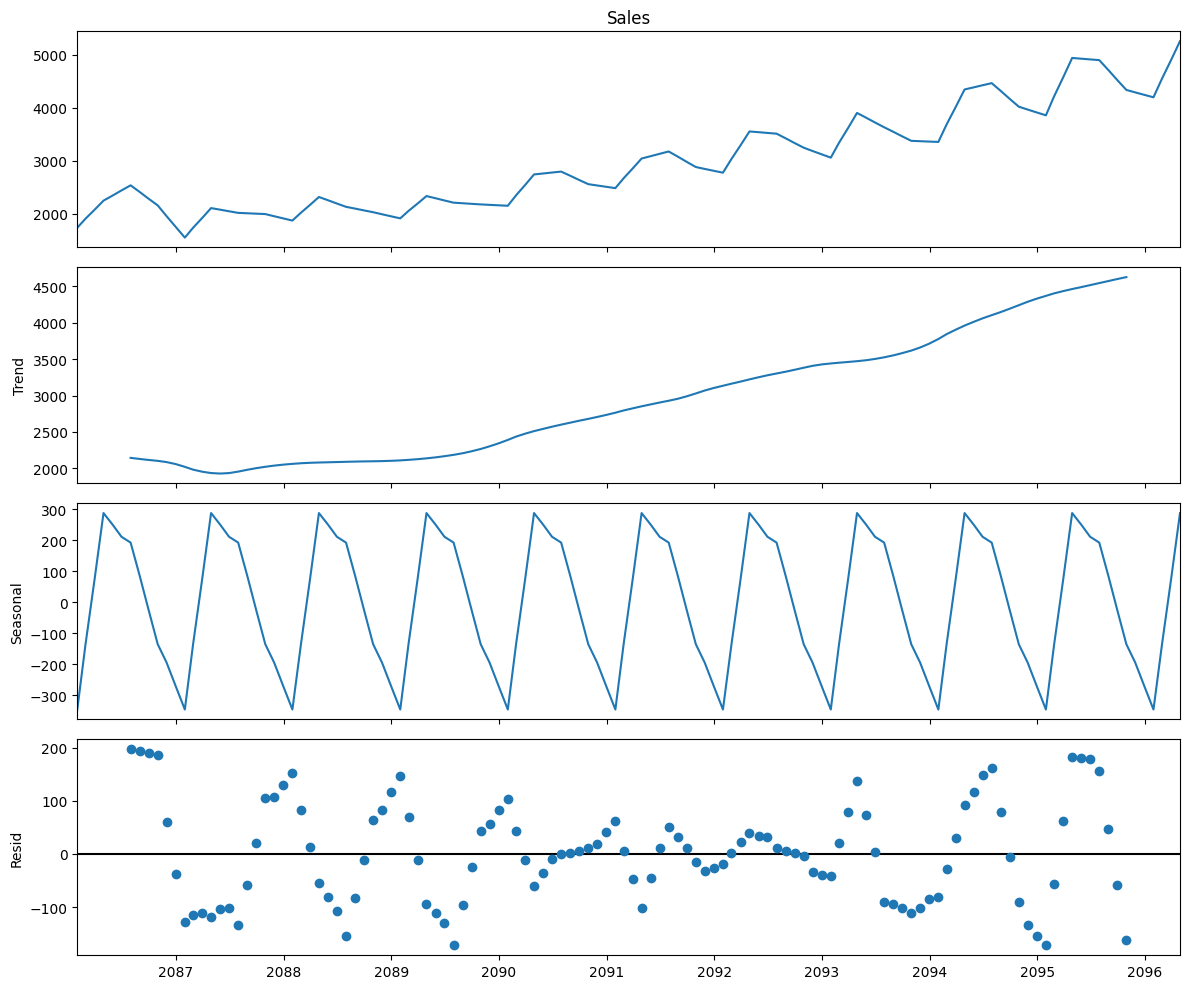

In [96]:
#Additive Seasonal Decomposition
decompose_ts_add = seasonal_decompose(interpolated_month.Sales, period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

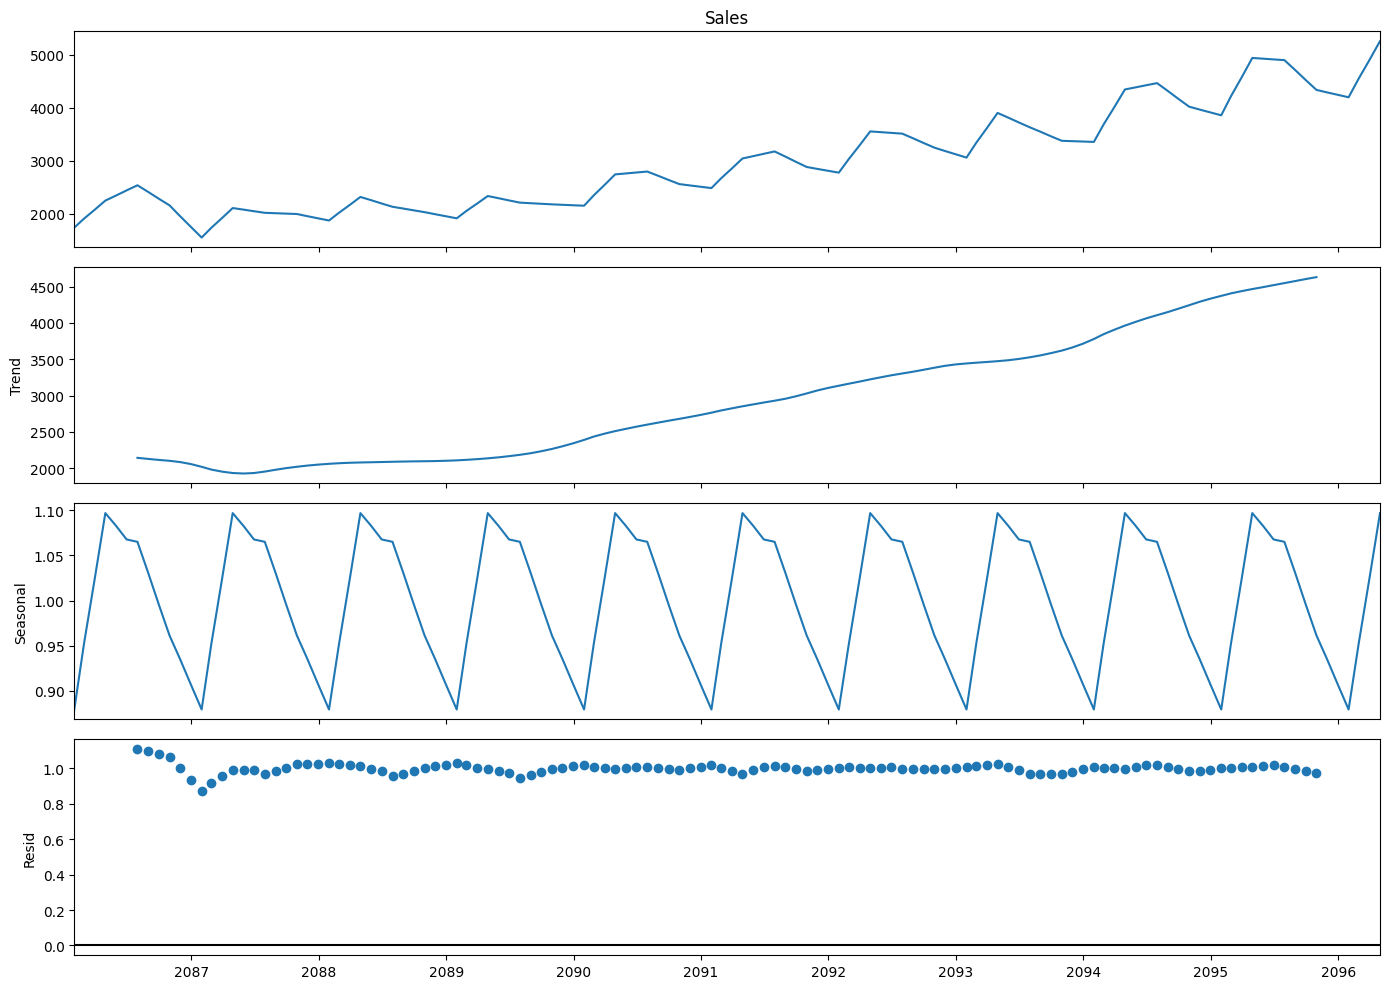

In [98]:
#Multiplicative Seasonal Decomposition
decompose_ts_add = seasonal_decompose(interpolated_month.Sales, period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

Splitting Train and Test Data
Leaving Test Data with 2 Years of Time Series


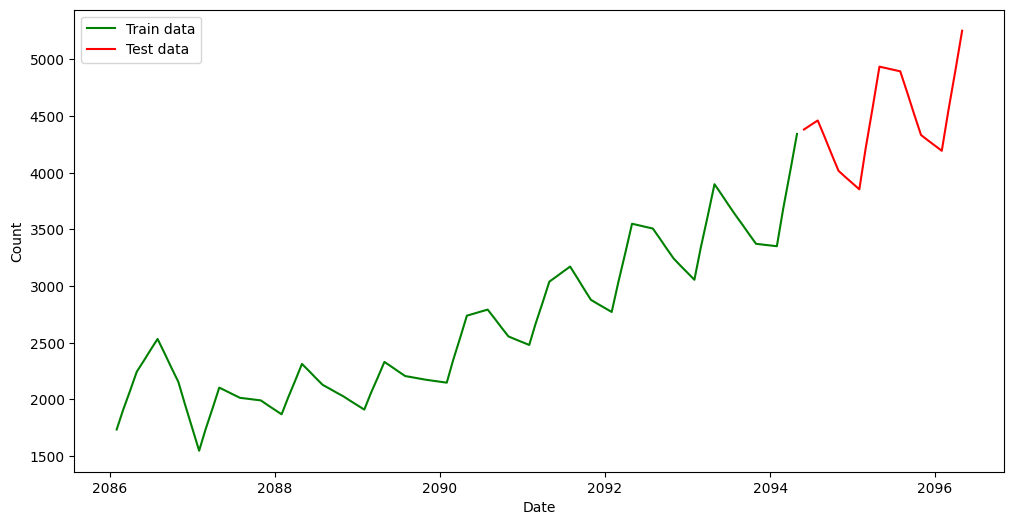

In [99]:
train_data = interpolated_month[:100]
test_data = interpolated_month[100:]

plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Count')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()
plt.show()

Autoregressive Integrated Moving Averages (ARIMA)
Stationary vs Non-stationary Time Series
Test of Stationarity

In [100]:
def test_stationarity(timeseries):

    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()

    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)

    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

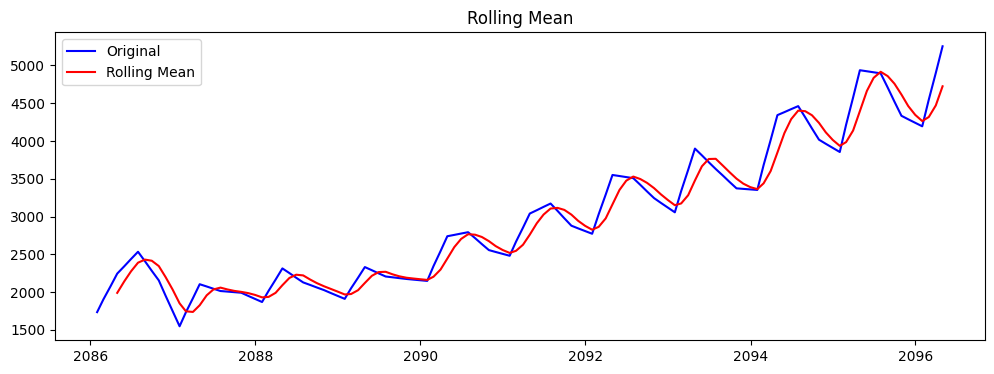

Results of Dickey Fuller Test:
Test Statistic                   0.572599
p-value                          0.986920
#Lags Used                      10.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [101]:
#Augmented Dicky Fuller Test
plt.figure(figsize=(12,4))
sales= pd.DataFrame()
sales['Sales'] = interpolated_month[['Sales']]
test_stationarity(sales)



In [102]:
def adf_test(series):
    result = adfuller(series.dropna())
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
adf_test(sales.Sales)

Fail to reject the null hypothesis
Data is non-stationary


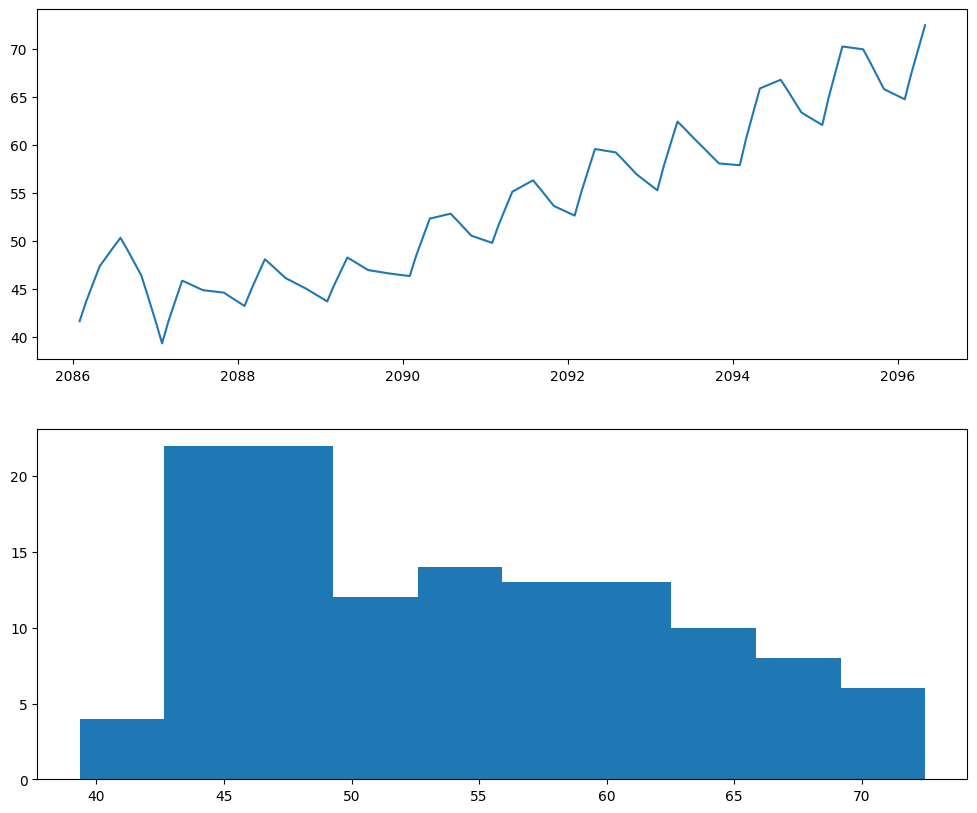

In [103]:
#Feature Scaling (Transformations)
# Square Root Transform
square_root = pd.DataFrame()
square_root = interpolated_month[['Sales']]
square_root['Sales'] = np.sqrt(square_root.Sales)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Sales'])

# Histogram
plt.subplot(212)
plt.hist(square_root['Sales'])
plt.show()


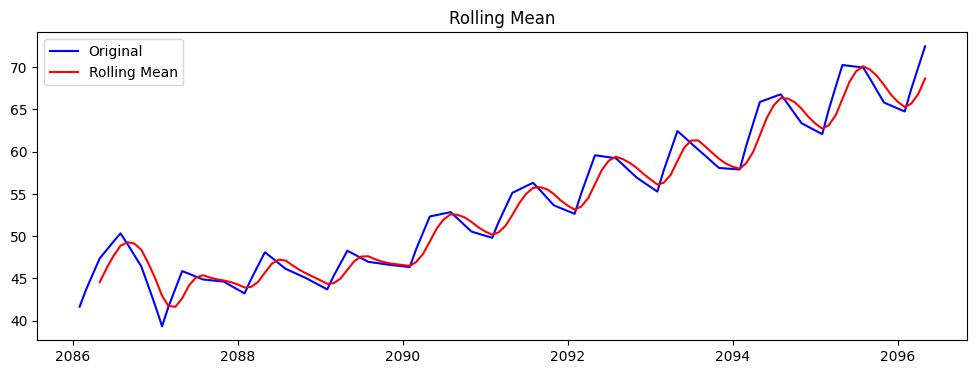

Results of Dickey Fuller Test:
Test Statistic                   0.728012
p-value                          0.990381
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [104]:
plt.figure(figsize=(12,4))
test_stationarity(square_root)


In [105]:
adf_test(square_root.Sales)

Fail to reject the null hypothesis
Data is non-stationary


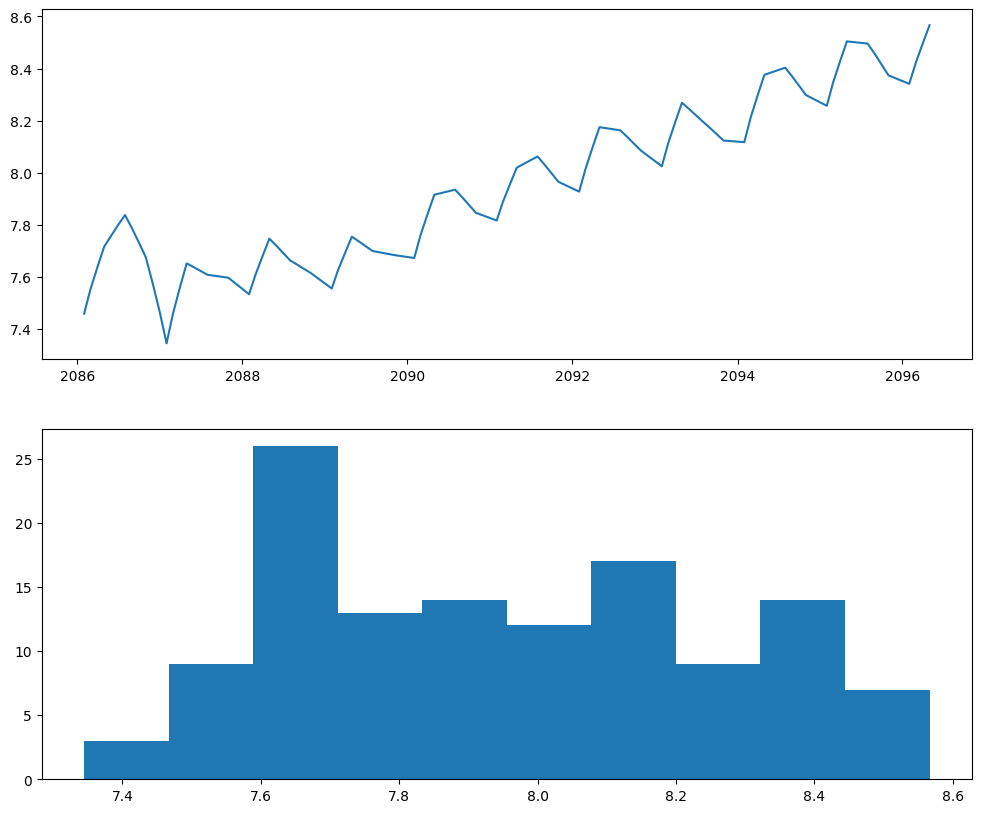

In [106]:
#Log Transform
log = pd.DataFrame()
log = interpolated_month[['Sales']]
log['Sales'] = np.log(log.Sales)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Sales'])

# Histogram
plt.subplot(212)
plt.hist(log['Sales'])
plt.show()

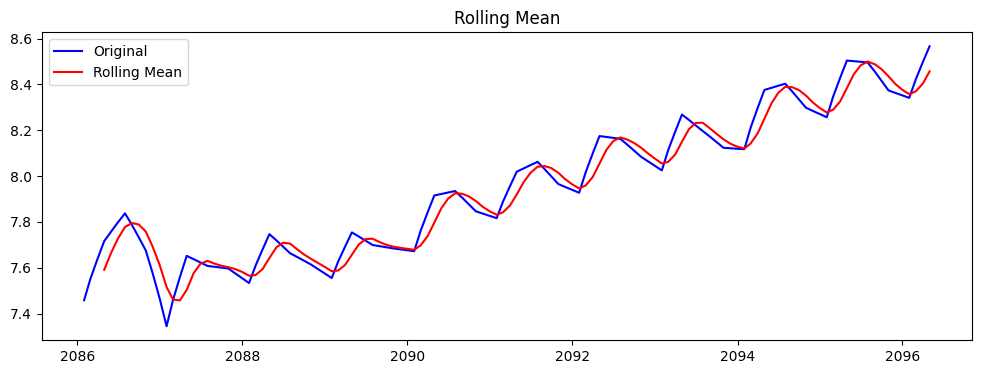

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [107]:
plt.figure(figsize=(12,4))
test_stationarity(log)

In [108]:
adf_test(log.Sales)


Fail to reject the null hypothesis
Data is non-stationary


Converting Non-Stationary Time Series into Stationary
Box Cox Transformation


,Sales
Date,
2086-01-31,7.458663
2086-02-28,7.552170
2086-03-31,7.637676
2086-04-30,7.716443
2086-05-31,7.758437


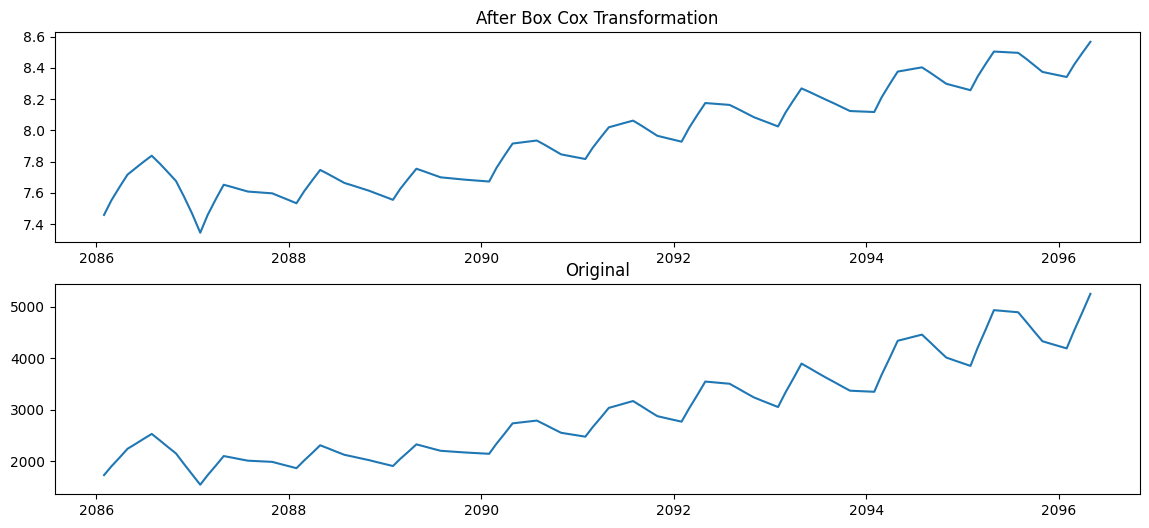

In [109]:
data_boxcox = pd.DataFrame()
data_boxcox['Sales'] = pd.Series(boxcox(interpolated_month['Sales'], lmbda=0), interpolated_month.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(14,6),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(interpolated_month, label='original')
axis[1].set_title('Original')
plt.show()


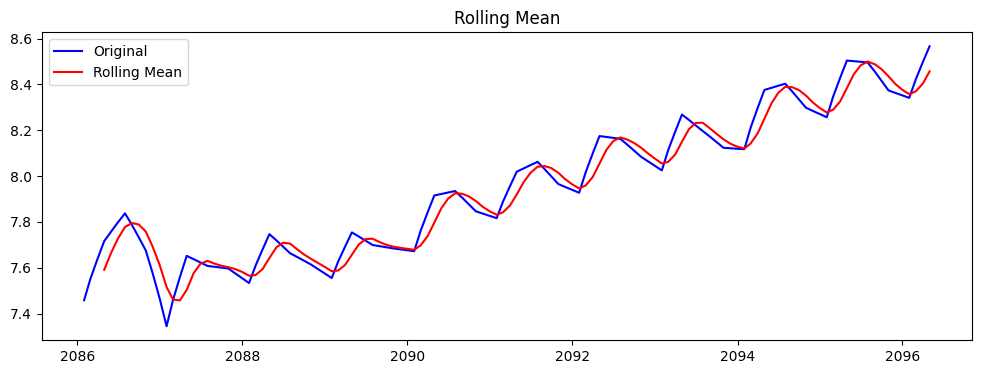

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [110]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox)


In [111]:
adf_test(data_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


Differencing of the Box-Cox Transformation

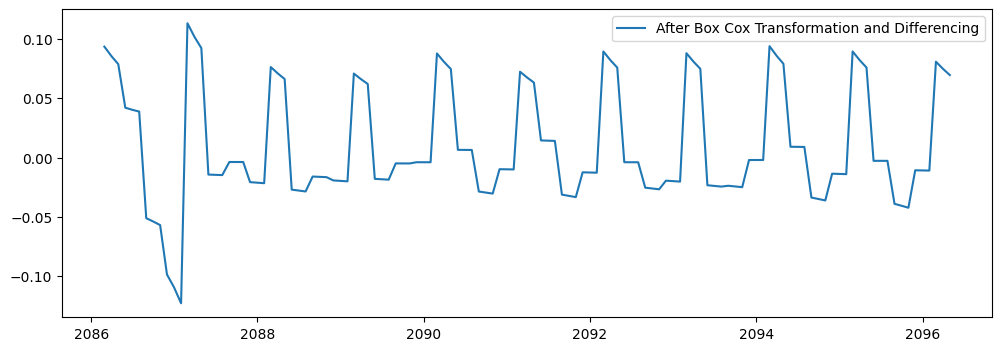

In [112]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

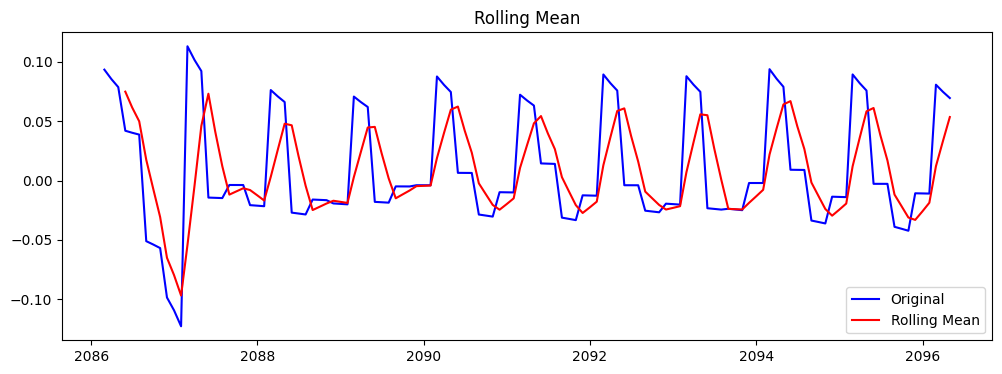

Results of Dickey Fuller Test:
Test Statistic                  -3.030060
p-value                          0.032181
#Lags Used                      12.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [113]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox_diff)

In [114]:
adf_test(data_boxcox_diff.Sales)


Reject the null hypothesis
Data is stationary


Building The Time Series Forecasting with Optimal Value using ARIMA

In [115]:
train_data_boxcox = data_boxcox[:100]
test_data_boxcox = data_boxcox[100:]
train_data_boxcox_diff = data_boxcox_diff[:99]
test_data_boxcox_diff = data_boxcox_diff[99:]

In [116]:
# Grid search ARIMA parameters for a time series
# Evaluate an ARIMA model for a given order (p,d,q) and return RMSE

def evaluate_arima_model(X, arima_order):

# Prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

# Make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

# Calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [119]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(3, 0, 2))
model_fit = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()

# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(data_boxcox.Sales[0])

# Now doing the reverse transformation
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['arima_forecast'] = np.exp(y_hat_ar['arima_forecast'])

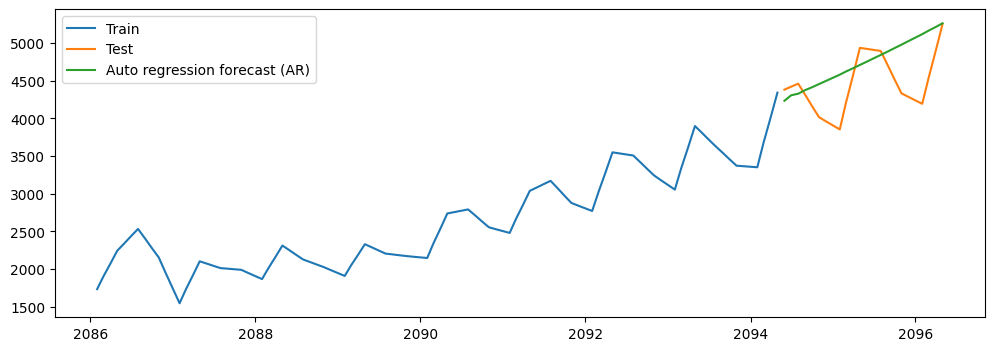

In [120]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar['arima_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

In [121]:
rmse_arima = np.sqrt(mean_squared_error(test_data.Sales, y_hat_ar['arima_forecast'][test_data.index.min():])).round(2)
rmse_arima

455.39

In [122]:
mape_arima = round(np.mean(np.abs((test_data.Sales - y_hat_ar['arima_forecast'][test_data.index.min():])/test_data.Sales)*100),2)
mape_arima

8.57

In [123]:
model_residual = model_fit.resid
model_residual.mean()


0.00022566856589238094

In [124]:
adf_test(model_residual)


Reject the null hypothesis
Data is stationary


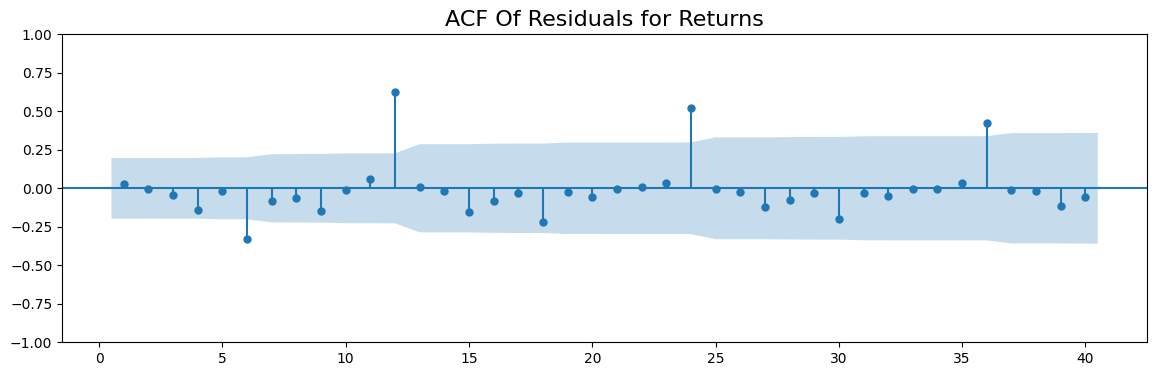

In [125]:
plt.rcParams["figure.figsize"] = (14,4)
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=16)
plt.show()

Data Pre-processing for Model Driven Techniques
Creating Dummy Variables of the Categorical Feature Month of Date Time feature


Data Pre-processing for Model Driven Techniques
Creating Dummy Variables of the Categorical Feature Month of Date Time feature


In [126]:
interpolated_month.reset_index(inplace=True)
interpolated_month['t'] = np.arange(1,len(interpolated_month)+1)
interpolated_month['t_squared'] = np.square(interpolated_month.t)
interpolated_month["month"] = interpolated_month.Date.dt.strftime("%b") # month extraction
interpolated_month["year"] = interpolated_month.Date.dt.strftime("%Y") # year extraction
months = pd.get_dummies(interpolated_month['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
cocacola = pd.concat([interpolated_month,months],axis=1)
cocacola['log_sales'] = np.log(cocacola['Sales'])
cocacola

,Date,Sales,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
0,2086-01-31,1734.827000,1,1,Jan,2086,1,0,0,0,0,0,0,0,0,0,0,0,7.458663
1,2086-02-28,1904.871666,2,4,Feb,2086,0,1,0,0,0,0,0,0,0,0,0,0,7.552170
2,2086-03-31,2074.916332,3,9,Mar,2086,0,0,1,0,0,0,0,0,0,0,0,0,7.637676
3,2086-04-30,2244.960999,4,16,Apr,2086,0,0,0,1,0,0,0,0,0,0,0,0,7.716443
4,2086-05-31,2341.242330,5,25,May,2086,0,0,0,0,1,0,0,0,0,0,0,0,7.758437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2095-12-31,4240.333333,120,14400,Dec,2095,0,0,0,0,0,0,0,0,0,0,0,1,8.352397
120,2096-01-31,4194.000000,121,14641,Jan,2096,1,0,0,0,0,0,0,0,0,0,0,0,8.341410
121,2096-02-29,4547.000000,122,14884,Feb,2096,0,1,0,0,0,0,0,0,0,0,0,0,8.422223
122,2096-03-31,4900.000000,123,15129,Mar,2096,0,0,1,0,0,0,0,0,0,0,0,0,8.496990


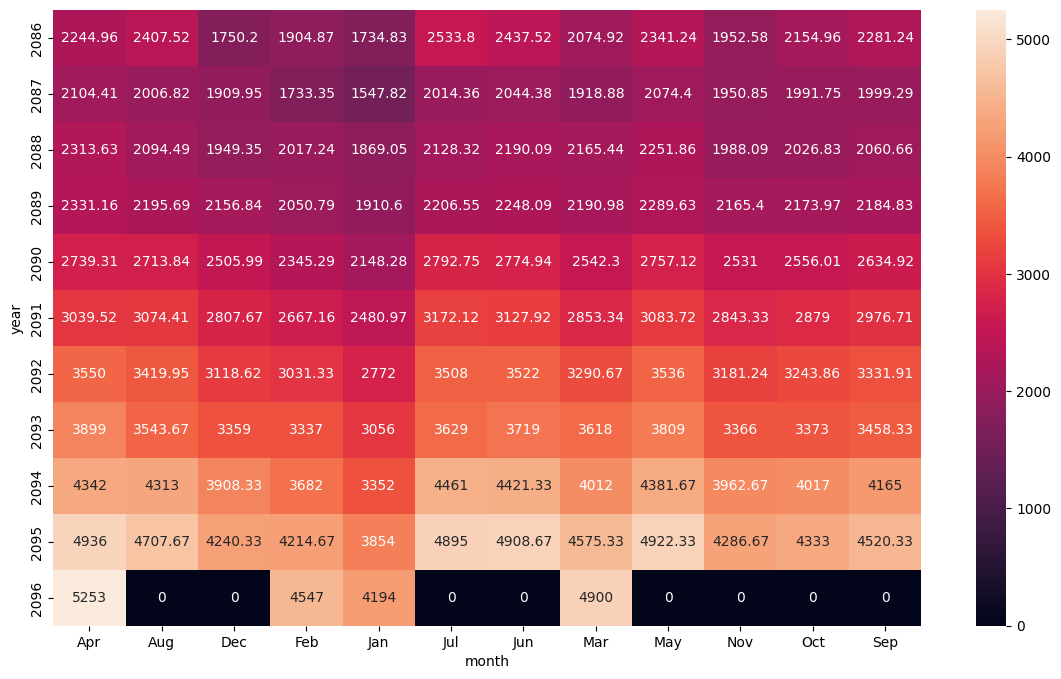

In [127]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=cocacola,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.show()


Splitting data into Train and Test
70% of data into Train data and rest for Test Data

In [128]:
size = 100

train_data = cocacola.iloc[:size]
test_data = cocacola.iloc[size:]


In [129]:
train_data

,Date,Sales,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
0,2086-01-31,1734.827000,1,1,Jan,2086,1,0,0,0,0,0,0,0,0,0,0,0,7.458663
1,2086-02-28,1904.871666,2,4,Feb,2086,0,1,0,0,0,0,0,0,0,0,0,0,7.552170
2,2086-03-31,2074.916332,3,9,Mar,2086,0,0,1,0,0,0,0,0,0,0,0,0,7.637676
3,2086-04-30,2244.960999,4,16,Apr,2086,0,0,0,1,0,0,0,0,0,0,0,0,7.716443
4,2086-05-31,2341.242330,5,25,May,2086,0,0,0,0,1,0,0,0,0,0,0,0,7.758437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2093-12-31,3359.000000,96,9216,Dec,2093,0,0,0,0,0,0,0,0,0,0,0,1,8.119399
96,2094-01-31,3352.000000,97,9409,Jan,2094,1,0,0,0,0,0,0,0,0,0,0,0,8.117312
97,2094-02-28,3682.000000,98,9604,Feb,2094,0,1,0,0,0,0,0,0,0,0,0,0,8.211211
98,2094-03-31,4012.000000,99,9801,Mar,2094,0,0,1,0,0,0,0,0,0,0,0,0,8.297045


In [130]:
test_data

,Date,Sales,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
100,2094-05-31,4381.666667,101,10201,May,2094,0,0,0,0,1,0,0,0,0,0,0,0,8.385184
101,2094-06-30,4421.333333,102,10404,Jun,2094,0,0,0,0,0,1,0,0,0,0,0,0,8.394197
102,2094-07-31,4461.000000,103,10609,Jul,2094,0,0,0,0,0,0,1,0,0,0,0,0,8.403128
103,2094-08-31,4313.000000,104,10816,Aug,2094,0,0,0,0,0,0,0,1,0,0,0,0,8.369389
104,2094-09-30,4165.000000,105,11025,Sep,2094,0,0,0,0,0,0,0,0,1,0,0,0,8.334472
105,2094-10-31,4017.000000,106,11236,Oct,2094,0,0,0,0,0,0,0,0,0,1,0,0,8.298291
106,2094-11-30,3962.666667,107,11449,Nov,2094,0,0,0,0,0,0,0,0,0,0,1,0,8.284672
107,2094-12-31,3908.333333,108,11664,Dec,2094,0,0,0,0,0,0,0,0,0,0,0,1,8.270866
108,2095-01-31,3854.000000,109,11881,Jan,2095,1,0,0,0,0,0,0,0,0,0,0,0,8.256867
109,2095-02-28,4214.666667,110,12100,Feb,2095,0,1,0,0,0,0,0,0,0,0,0,0,8.346326


Building Ordinary Square Model


 Linear Model

In [143]:
import numpy as np

import statsmodels.formula.api as smf
# linear model
linear_model = smf.ols('Sales~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_linear))**2))
rmse_linear

686.8740863668942

In [132]:
#Exponential Model
exp = smf.ols('log_sales~t',data=train_data).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test_data['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

530.326802509923

In [133]:
# Quadratic Mode
quad = smf.ols('Sales~t+t_squared',data=train_data).fit()
pred_quad = pd.Series(quad.predict(test_data[["t","t_squared"]]))
rmse_quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_quad))**2))
rmse_quad


371.29418344986675

In [134]:
#Additive seasonality
add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea


1837.7879723483793

In [135]:
#Additive Seasonality Quadratic
add_sea_quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

225.8049881036695

In [136]:
#Multiplicative Seasonality
mul_sea = smf.ols('log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_mult_sea = pd.Series(mul_sea.predict(test_data))
rmse_mult_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea


1904.7944171920315

In [137]:
#Multiplicative Additive Seasonality
mul_add_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test_data))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea

396.41978173823406

In [144]:
#Compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_mult_sea","rmse_mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
type(data)

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,225.804988
2,rmse_quad,371.294183
6,rmse_mult_add_sea,396.419782
1,rmse_exp,530.326803
0,rmse_linear,686.874086
3,rmse_add_sea,1837.787972
5,rmse_mult_sea,1904.794417


#This the way we can perform Time series analysis/forecasting